In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from HOwDI.util import create_db_engine

from HOwDI.postprocessing.input_scenarios import (
    get_monte_carlo_info,
    cluster_monet_carlo_info,
)

In [2]:
engine = create_db_engine(
    "sqlite:///C:/Users/bpeco/Box/h2@scale/h2_model/test1201.sqlite"
)
mc_info = get_monte_carlo_info(
    uuid="924c2f2c-513f-4a39-b005-c6dd37880692",
    engine=engine,
    normalize=False
)

In [3]:
mc_info.columns
[c for c in mc_info.columns if "FuelStation" in c]

['austin/FuelStation',
 'pasadena/FuelStation',
 'cons_h/austin_priceFuelStation_1.95',
 'cons_h/pasadena_priceFuelStation_1.95',
 'cons_h/pasadena_priceFuelStation_1.90',
 'cons_h/austin_priceFuelStation_1.85',
 'cons_h/pasadena_priceFuelStation_1.80',
 'cons_h/austin_priceFuelStation_2.75',
 'cons_h/pasadena_priceFuelStation_2.70',
 'cons_h/austin_priceFuelStation_1.55',
 'cons_h/pasadena_priceFuelStation_1.30',
 'average/FuelStation']

In [10]:
data = {n: cluster_monet_carlo_info(mc_info, n_clusters=n, n_bins=1) for n in range(2,60)}

In [11]:
inertia = pd.concat(
    [
        distortions.rename(columns={"Inertia": n})
        for n, (_, distortions) in data.items()
    ], axis=1
)

<AxesSubplot:>

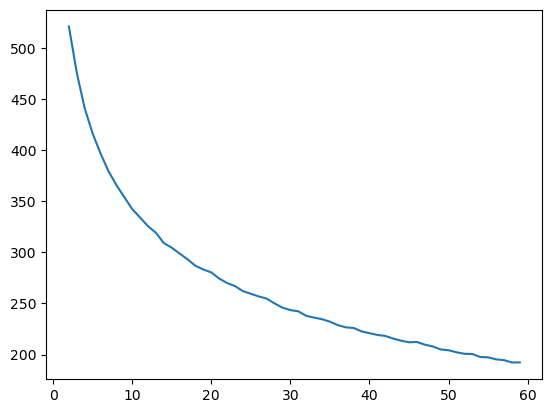

In [12]:
inertia.max().T.plot()

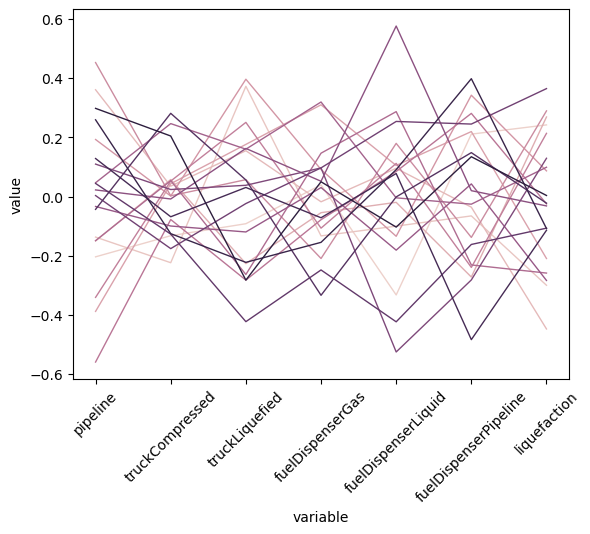

In [18]:
clustered_data = data[20][0]
value_column = "average/FuelStation"
melt = pd.melt(
    clustered_data[clustered_data["bin"] == 0],
    id_vars=[value_column, "bin", "cluster"],
)

fix, ax = plt.subplots()
g = sns.lineplot(
    x="variable",
    y="value",
    data=melt,
    hue="cluster",
    # units="cluster",
    # style="cluster",
    estimator=None,
    lw=1,
)
plt.xticks(rotation=45)
ax.legend().remove()

In [ ]:
clustered_data[["bin","average/FuelStation"]].groupby("bin").mean().to_dict()

{'average/FuelStation': {0: 4.292339946796719,
  1: 3.6528698153698147,
  2: 4.116677040883792,
  3: 4.414980692918193,
  4: 3.8827614814814817}}

In [16]:
data[20][0]

,cluster,pipeline,truckCompressed,truckLiquefied,fuelDispenserGas,fuelDispenserLiquid,fuelDispenserPipeline,liquefaction,bin,average/FuelStation
0,0,-0.203540,-0.132172,-0.091632,0.039559,-0.332359,0.211106,0.242288,0,3.001525
1,1,-0.136798,-0.223401,0.372726,-0.132779,-0.099781,-0.065235,-0.299607,0,3.001525
2,2,0.361051,0.035204,0.155079,-0.017547,0.095522,-0.035794,-0.447259,0,3.001525
3,3,-0.149657,0.057743,-0.226467,-0.054353,-0.019382,-0.271751,0.269043,0,3.001525
4,4,-0.387920,0.043519,0.176439,0.310158,0.105185,0.219770,-0.209210,0,3.001525
5,5,0.192955,0.001886,0.396703,0.091529,-0.134091,0.342606,0.086954,0,3.001525
6,6,0.452937,0.002666,0.057213,-0.209148,0.179876,-0.137903,0.289602,0,3.001525
7,7,-0.340552,0.052489,0.250790,-0.106592,0.112162,-0.239316,0.213728,0,3.001525
8,8,-0.559085,-0.077460,-0.282192,-0.078123,0.084840,0.281230,-0.024657,0,3.001525
9,9,-0.148901,0.054057,-0.263238,0.146681,0.287147,-0.230905,-0.258421,0,3.001525
